In [1]:
# scikeras is intergration of scikit-learn and keras
!pip install scikeras

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 59.5 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense, Input, Dropout
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam

In [3]:
# read the dataset
df = pd.read_csv('Alphabets_data.csv')

# 1. Data Exploration and Preprocessing

In [4]:
# no. of rows and no. of cols
df.shape

(20000, 17)

In [5]:
# display first few records
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2,8,3,5,1,8,13,0,6,6,10,8,0,8,0,8
1,I,5,12,3,7,2,10,5,5,4,13,3,9,2,8,4,10
2,D,4,11,6,8,6,10,6,2,6,10,3,7,3,7,3,9
3,N,7,11,6,6,3,5,9,4,6,4,4,10,6,10,2,8
4,G,2,1,3,1,1,8,6,6,6,6,5,9,1,7,5,10


In [6]:
# dispaly last few records
df.tail()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
19995,D,2,2,3,3,2,7,7,7,6,6,6,4,2,8,3,7
19996,C,7,10,8,8,4,4,8,6,9,12,9,13,2,9,3,7
19997,T,6,9,6,7,5,6,11,3,7,11,9,5,2,12,2,4
19998,S,2,3,4,2,1,8,7,2,6,10,6,8,1,9,5,8
19999,A,4,9,6,6,2,9,5,3,1,8,1,8,2,7,2,8


In [7]:
# display datatypes and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   letter  20000 non-null  object
 1   xbox    20000 non-null  int64 
 2   ybox    20000 non-null  int64 
 3   width   20000 non-null  int64 
 4   height  20000 non-null  int64 
 5   onpix   20000 non-null  int64 
 6   xbar    20000 non-null  int64 
 7   ybar    20000 non-null  int64 
 8   x2bar   20000 non-null  int64 
 9   y2bar   20000 non-null  int64 
 10  xybar   20000 non-null  int64 
 11  x2ybar  20000 non-null  int64 
 12  xy2bar  20000 non-null  int64 
 13  xedge   20000 non-null  int64 
 14  xedgey  20000 non-null  int64 
 15  yedge   20000 non-null  int64 
 16  yedgex  20000 non-null  int64 
dtypes: int64(16), object(1)
memory usage: 2.6+ MB


In [8]:
# letter is target variable of type object and rest are the independent variable of type int

In [9]:
# checking the duplicated values
df.duplicated().sum()

1332

In [10]:
# dropping the duplicate records and reset the index
df.drop_duplicates(inplace=True, ignore_index=True)

In [11]:
# checking the missing values
df.isnull().sum()

,0
letter,0
xbox,0
ybox,0
width,0
height,0
onpix,0
xbar,0
ybar,0
x2bar,0
y2bar,0


In [12]:
# checking the target variables balance and imbalance
df['letter'].value_counts().sort_index()

,count
letter,
A,756
B,730
C,710
D,760
E,725
F,752
G,743
H,704
I,524


In [13]:
# checking the unique values in target variable
df['letter'].unique()

array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)

In [14]:
# checking the no of unique values in target variable
df['letter'].nunique()

26

In [15]:
# checking the balance data for each column
for col in df.columns:
    print({col:df[col].value_counts()})

{'letter': letter
P    782
U    768
D    760
Q    760
A    756
F    752
T    748
Y    746
G    743
R    737
M    732
B    730
S    729
W    726
E    725
O    718
K    718
J    715
C    710
V    706
H    704
N    688
X    678
L    673
Z    640
I    524
Name: count, dtype: int64}
{'xbox': xbox
4     4325
3     3901
5     3097
2     2577
6     1873
7     1002
1      855
8      510
9      284
10     121
11      48
0       46
12      20
13       4
14       3
15       2
Name: count, dtype: int64}
{'ybox': ybox
9     2628
7     2211
10    2127
8     2093
6     1634
11    1583
5     1448
4     1217
3     1204
1      625
2      487
0      394
12     320
13     270
15     230
14     197
Name: count, dtype: int64}
{'width': width
5     4126
6     3558
4     3531
7     1931
3     1809
8     1411
2      945
9      676
1      254
10     237
11      91
0       48
12      39
13       6
14       4
15       2
Name: count, dtype: int64}
{'height': height
6     3500
8     3443
7     2608
5     2564
4     

In [16]:
# checking the unique values in each column
for col in df.columns:
    print({col:df[col].unique()})

{'letter': array(['T', 'I', 'D', 'N', 'G', 'S', 'B', 'A', 'J', 'M', 'X', 'O', 'R',
       'F', 'C', 'H', 'W', 'L', 'P', 'E', 'V', 'Y', 'Q', 'U', 'K', 'Z'],
      dtype=object)}
{'xbox': array([ 2,  5,  4,  7,  1, 11,  3,  6, 12,  8,  9, 10, 13,  0, 15, 14])}
{'ybox': array([ 8, 12, 11,  1,  2, 15,  9, 13,  4, 10,  3,  5,  6, 14,  7,  0])}
{'width': array([ 3,  6,  5,  4, 13,  8,  2,  7, 11, 12,  9,  1, 10,  0, 15, 14])}
{'height': array([ 5,  7,  8,  6,  1,  4,  2,  9,  3, 11, 10,  0, 12, 13, 15, 14])}
{'onpix': array([ 1,  2,  6,  3,  4,  7,  9,  5, 10,  8,  0, 11, 14, 13, 12, 15])}
{'xbar': array([ 8, 10,  5, 13,  6,  7,  3,  9,  0,  4,  1, 12, 11, 14,  2, 15])}
{'ybar': array([13,  5,  6,  9,  8,  7,  2, 11, 10,  1,  4, 14,  0,  3, 12, 15])}
{'x2bar': array([ 0,  5,  2,  4,  6,  3,  7,  9,  1,  8, 10, 13, 14, 15, 12, 11])}
{'y2bar': array([ 6,  4,  9,  2,  8,  3,  5, 11,  7,  1, 10,  0, 13, 14, 12, 15])}
{'xybar': array([ 6, 13, 10,  4,  5,  7,  8, 12, 11, 14,  0,  9,  3, 15,  1,  2

In [17]:
# checking the no of unique values in each column
for col in df.columns:
    print({col:df[col].nunique()})

{'letter': 26}
{'xbox': 16}
{'ybox': 16}
{'width': 16}
{'height': 16}
{'onpix': 16}
{'xbar': 16}
{'ybar': 16}
{'x2bar': 16}
{'y2bar': 16}
{'xybar': 16}
{'x2ybar': 16}
{'xy2bar': 16}
{'xedge': 16}
{'xedgey': 16}
{'yedge': 16}
{'yedgex': 16}


In [18]:
df.nunique()

,0
letter,26
xbox,16
ybox,16
width,16
height,16
onpix,16
xbar,16
ybar,16
x2bar,16
y2bar,16


In [19]:
# summary statistics
df.describe()

,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
count,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000,18668.000000
mean,4.150793,7.244322,5.279891,5.506910,3.660596,6.919381,7.529409,4.584637,5.201361,8.353171,6.452700,7.924577,3.131455,8.351832,3.796872,7.784390
std,1.879428,3.187660,1.934960,2.178292,2.160555,2.032226,2.319834,2.625714,2.320102,2.468905,2.624673,2.106957,2.323901,1.574853,2.540271,1.657358
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,5.000000,4.000000,4.000000,2.000000,6.000000,6.000000,3.000000,4.000000,7.000000,5.000000,7.000000,2.000000,8.000000,2.000000,7.000000
50%,4.000000,8.000000,5.000000,6.000000,3.000000,7.000000,7.000000,4.000000,5.000000,8.000000,6.000000,8.000000,3.000000,8.000000,4.000000,8.000000
75%,5.000000,10.000000,6.000000,7.000000,5.000000,8.000000,9.000000,6.000000,7.000000,10.000000,8.000000,9.000000,4.000000,9.000000,5.000000,9.000000
max,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000


In [20]:
# converting independent values to float
for col in df.columns[1:]:
    if df[col].dtype != 'float':
        df[col] = df[col].astype(float)
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,2.0,8.0,3.0,5.0,1.0,8.0,13.0,0.0,6.0,6.0,10.0,8.0,0.0,8.0,0.0,8.0
1,I,5.0,12.0,3.0,7.0,2.0,10.0,5.0,5.0,4.0,13.0,3.0,9.0,2.0,8.0,4.0,10.0
2,D,4.0,11.0,6.0,8.0,6.0,10.0,6.0,2.0,6.0,10.0,3.0,7.0,3.0,7.0,3.0,9.0
3,N,7.0,11.0,6.0,6.0,3.0,5.0,9.0,4.0,6.0,4.0,4.0,10.0,6.0,10.0,2.0,8.0
4,G,2.0,1.0,3.0,1.0,1.0,8.0,6.0,6.0,6.0,6.0,5.0,9.0,1.0,7.0,5.0,10.0


In [21]:
# applying normalization on independent variables
scaler = MinMaxScaler()
df.iloc[:,1:] = scaler.fit_transform(df.iloc[:,1:])
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,T,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,I,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,D,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,N,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,G,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667


In [22]:
# applying label encoder on target variable
label_encoder = LabelEncoder()
df['letter'] = label_encoder.fit_transform(df['letter'])
df.head()

,letter,xbox,ybox,width,height,onpix,xbar,ybar,x2bar,y2bar,xybar,x2ybar,xy2bar,xedge,xedgey,yedge,yedgex
0,19,0.133333,0.533333,0.2,0.333333,0.066667,0.533333,0.866667,0.000000,0.400000,0.400000,0.666667,0.533333,0.000000,0.533333,0.000000,0.533333
1,8,0.333333,0.800000,0.2,0.466667,0.133333,0.666667,0.333333,0.333333,0.266667,0.866667,0.200000,0.600000,0.133333,0.533333,0.266667,0.666667
2,3,0.266667,0.733333,0.4,0.533333,0.400000,0.666667,0.400000,0.133333,0.400000,0.666667,0.200000,0.466667,0.200000,0.466667,0.200000,0.600000
3,13,0.466667,0.733333,0.4,0.400000,0.200000,0.333333,0.600000,0.266667,0.400000,0.266667,0.266667,0.666667,0.400000,0.666667,0.133333,0.533333
4,6,0.133333,0.066667,0.2,0.066667,0.066667,0.533333,0.400000,0.400000,0.400000,0.400000,0.333333,0.600000,0.066667,0.466667,0.333333,0.666667


# 2. Model Implementation

In [23]:
# splitting target and independent variables
X = df.drop(columns='letter').values
y = df['letter'].values

In [24]:
# splitting training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [25]:
X_train.shape

(14934, 16)

In [26]:
# define the keras model
model = Sequential()
model.add(Input(shape=(16,)))
model.add(Dense(16, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(8, kernel_initializer='random_uniform', activation='relu'))
model.add(Dense(26, kernel_initializer='random_uniform', activation='softmax'))

adam=Adam(learning_rate=0.001)
# compile the keras model
model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
# fit the keras model on the dataset
history = model.fit(X_train, y_train, epochs=50,validation_split=0.2, batch_size=10)
# evaluate the keras model
scores = model.evaluate(X_test, y_test)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

Epoch 1/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.0606 - loss: 3.1747 - val_accuracy: 0.1212 - val_loss: 2.8079
Epoch 2/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.1138 - loss: 2.7908 - val_accuracy: 0.1239 - val_loss: 2.7295
Epoch 3/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1343 - loss: 2.7080 - val_accuracy: 0.1342 - val_loss: 2.7030
Epoch 4/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1440 - loss: 2.6691 - val_accuracy: 0.1476 - val_loss: 2.6682
Epoch 5/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1455 - loss: 2.6384 - val_accuracy: 0.1644 - val_loss: 2.6436
Epoch 6/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.1569 - loss: 2.6079 - val_accuracy: 0.1543 - val_loss: 2.6168
Epoch 7/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.1638 - loss: 2.5724 - val_accuracy: 0.1486 - val_loss: 2.6022
Epoch 8/50
1195/1195 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.1765 - loss: 2.5551 - 

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


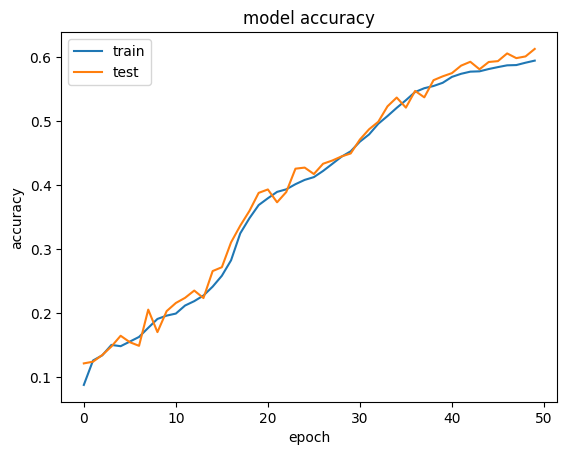

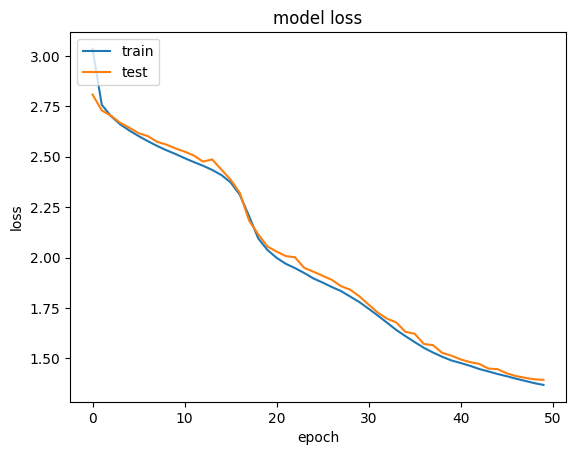

In [27]:
# list all data in history
print(history.history.keys())
# summarize history for accuracy
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 3. Hyperparameter Tuning

#### Tuning of Hyperparameters :- Batch Size and Epochs

In [28]:
# create model
def create_model():
    model = Sequential()
    model.add(Input(shape=(16,)))
    model.add(Dense(32, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(16, kernel_initializer='random_uniform', activation='relu'))
    model.add(Dense(26, kernel_initializer='random_uniform', activation='softmax'))

    adam=Adam(learning_rate=0.001)
    model.compile(loss='sparse_categorical_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [29]:
# Create the model
model = KerasClassifier(model = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [50,100,150]
epochs = [10,20,30]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START batch_size=50, epochs=10....................................
[CV 1/5; 1/9] END .....batch_size=50, epochs=10;, score=0.299 total time=   8.4s
[CV 2/5; 1/9] START batch_size=50, epochs=10....................................
[CV 2/5; 1/9] END .....batch_size=50, epochs=10;, score=0.372 total time=   7.0s
[CV 3/5; 1/9] START batch_size=50, epochs=10....................................
[CV 3/5; 1/9] END .....batch_size=50, epochs=10;, score=0.382 total time=   8.7s
[CV 4/5; 1/9] START batch_size=50, epochs=10....................................
[CV 4/5; 1/9] END .....batch_size=50, epochs=10;, score=0.406 total time=   7.5s
[CV 5/5; 1/9] START batch_size=50, epochs=10....................................
[CV 5/5; 1/9] END .....batch_size=50, epochs=10;, score=0.377 total time=   8.3s
[CV 1/5; 2/9] START batch_size=50, epochs=20....................................
[CV 1/5; 2/9] END .....batch_size=50, epochs=20;,

In [30]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.5605329950661394, using {'batch_size': 50, 'epochs': 30}
0.36708247460361276,0.03620589098657311 with: {'batch_size': 50, 'epochs': 10}
0.4851963330269524,0.05721987547831018 with: {'batch_size': 50, 'epochs': 20}
0.5605329950661394,0.014777375011522521 with: {'batch_size': 50, 'epochs': 30}
0.31947322075051277,0.025639605151297068 with: {'batch_size': 100, 'epochs': 10}
0.42821664587626984,0.035234349477843804 with: {'batch_size': 100, 'epochs': 20}
0.4867397929541073,0.03324055859220242 with: {'batch_size': 100, 'epochs': 30}
0.32181520682053577,0.0279511794372663 with: {'batch_size': 150, 'epochs': 10}
0.38455802337030465,0.05241390048251628 with: {'batch_size': 150, 'epochs': 20}
0.48165376600679305,0.03004663977056164 with: {'batch_size': 150, 'epochs': 30}


#### Tuning of Hyperparameters:- Learning rate and Drop out rate

In [31]:
from keras.layers import Dropout, Input

# Defining the model

def create_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Input(shape=(16,)))
    model.add(Dense(32,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(16,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = learning_rate)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(model = create_model,verbose = 0,batch_size = 50,epochs = 10, learning_rate=0.001, dropout_rate=0.1)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.519 total time=   6.7s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.550 total time=   6.8s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.501 total time=   8.5s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.568 total time=   7.7s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.411 total time=   8.0s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [32]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.6678013521867813, using {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.5095688371422401,0.05482636075569552 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.6678013521867813,0.031000665745541316 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.039373610719009876,0.004102091384755795 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.5091764244748005,0.028651076670327697 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.6520697077377724,0.03150190138319722 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.04131522375033944,0.002831235573848062 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.5133248990770679,0.019503025326896756 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.5962206848116789,0.03152120777829418 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.04165000781461799,0.0033528924401319163 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


#### Tuning of Hyperparameters:- Activation Function and Kernel Initializer

In [33]:
# Defining the model

def create_model(activation_function,init):
    model = Sequential()
    model.add(Input(shape=(16,)))
    model.add(Dense(32,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(16,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.0))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = 0.01)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(model = create_model,verbose = 0,batch_size = 50,epochs = 10, activation_function = 'softmax', init = 'uniform')

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.274 total time=   8.8s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.333 total time=   7.9s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.235 total time=   8.4s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.435 total time=   7.8s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.268 total time=   7.2s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [34]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.7508370834903919, using {'activation_function': 'tanh', 'init': 'normal'}
0.309023652617471,0.07055745581373955 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.24487785987549082,0.05581846979287238 with: {'activation_function': 'softmax', 'init': 'normal'}
0.0374315043688984,0.0012817575879648462 with: {'activation_function': 'softmax', 'init': 'zero'}
0.5368325480968994,0.06662828530523057 with: {'activation_function': 'relu', 'init': 'uniform'}
0.5993746511731681,0.14054482841856658 with: {'activation_function': 'relu', 'init': 'normal'}
0.040042954611757,0.0024398699627447853 with: {'activation_function': 'relu', 'init': 'zero'}
0.7484265709568433,0.013285117584305868 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.7508370834903919,0.017399279593076168 with: {'activation_function': 'tanh', 'init': 'normal'}
0.03923922619809754,0.002778841894923342 with: {'activation_function': 'tanh', 'init': 'zero'}
0.7085843746657485,0.013805764725440102 with: {'a

#### Tuning of Hyperparameter :-Number of Neurons in activation layer

In [35]:
# Defining the model

def create_model(neuron1,neuron2):
    model = Sequential()
    model.add(Input(shape=(16,)))
    model.add(Dense(neuron1,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(neuron2,kernel_initializer = 'normal',activation = 'relu'))
    model.add(Dropout(0.0))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(model = create_model,verbose = 0,batch_size = 50,epochs = 10, neuron1 = 16, neuron2 = 8)

# Define the grid search parameters

neuron1 = [16,32,64]
neuron2 = [8,16,32]

# Make a dictionary of the grid search parameters

param_grids = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=16, neuron2=8.......................................
[CV 1/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.302 total time=   9.4s
[CV 2/5; 1/9] START neuron1=16, neuron2=8.......................................
[CV 2/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.431 total time=   7.4s
[CV 3/5; 1/9] START neuron1=16, neuron2=8.......................................
[CV 3/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.456 total time=  10.4s
[CV 4/5; 1/9] START neuron1=16, neuron2=8.......................................
[CV 4/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.366 total time=   7.7s
[CV 5/5; 1/9] START neuron1=16, neuron2=8.......................................
[CV 5/5; 1/9] END ........neuron1=16, neuron2=8;, score=0.427 total time=   8.4s
[CV 1/5; 2/9] START neuron1=16, neuron2=16......................................
[CV 1/5; 2/9] END .......neuron1=16, neuron2=16;,

In [36]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))

Best : 0.6218018647898428, using {'neuron1': 64, 'neuron2': 32}
0.39641294459514337,0.05559286198831734 with: {'neuron1': 16, 'neuron2': 8}
0.43993920070248593,0.04582525005446275 with: {'neuron1': 16, 'neuron2': 16}
0.519887720645234,0.01585664288050353 with: {'neuron1': 16, 'neuron2': 32}
0.4023041574888818,0.036624342821812296 with: {'neuron1': 32, 'neuron2': 8}
0.5325463254365703,0.029588925844578066 with: {'neuron1': 32, 'neuron2': 16}
0.578277200756751,0.012909242481097108 with: {'neuron1': 32, 'neuron2': 32}
0.49919548676100567,0.03182933623841195 with: {'neuron1': 64, 'neuron2': 8}
0.5707781946819787,0.015881522060706272 with: {'neuron1': 64, 'neuron2': 16}
0.6218018647898428,0.01397661363821517 with: {'neuron1': 64, 'neuron2': 32}


#### Training model with optimum values of Hyperparameters

In [37]:
from sklearn.metrics import classification_report, accuracy_score

# Defining the model

def create_model():
    model = Sequential()
    model.add(Input(shape=(16,)))
    model.add(Dense(64,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(32,kernel_initializer = 'normal',activation = 'tanh'))
    model.add(Dropout(0.0))
    model.add(Dense(26,activation = 'softmax'))

    adam = Adam(learning_rate = 0.01) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'sparse_categorical_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model = KerasClassifier(model = create_model,verbose = 0,batch_size = 50,epochs = 10)

# Fitting the model

model.fit(X_train,y_train)

# Predicting using trained model

y_predict = model.predict(X_test)

# Printing the metrics
print(accuracy_score(y_test,y_predict))

0.838243170862346


# 4. Evaluation

In [38]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
# Evaluate the best model
accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1-score: {f1}")

Accuracy: 0.838243170862346
Precision: 0.8483320648015354
Recall: 0.838243170862346
F1-score: 0.8394133968664498


#### On default hyperparameters the accuracy of model is 58.84% and the tuned model accuracy is 83.82%. Hyperparameter tuning increases the accuracy of model and reduces loss.